# This code was designed to prove that we can make an estimator that works for an arbitrary function

# This code is meant to be run by Tensorflow 2.0 under Conda, the conda environment creating file is provided in the base folder of this repository

## The cell bellow suppresses the warnings from tf and other packages that are overly verbose

In [1]:
import warnings
warnings.filterwarnings('ignore')

## The imports are self explanatory

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Using TensorFlow backend.


# <span style="color:red">This function has been changed to a noisy version of itself to test the generalization properties of the network</span>
## This function generates the dataset points for the test, feel free to modify it as you wish to see if the network can still fit it

In [3]:
def generatePointsNoise(vector_size,noise = 0.2, noiseType = 'both'):
    x = np.zeros(vector_size)
    y = np.zeros(vector_size)
    for i in range(0,len(x)):
        if noiseType == 'output':
            x[i] = np.random.random()*np.pi*5 - np.pi*5/2 
            y[i] = np.cos(x[i]) + (np.random.random()-0.5)*noise
        if noiseType == 'measurement':
            x[i] = np.random.random()*np.pi*5 - np.pi*5/2
            y[i] = np.cos(x[i])
            x[i] = x[i] + (np.random.random()-0.5)*noise
        if noiseType == 'both':
            x[i] = np.random.random()*np.pi*5 - np.pi*5/2
            y[i] = np.cos(x[i]) + (np.random.random()-0.5)*noise
            x[i] = x[i] + (np.random.random()-0.5)*noise
    return x,y

## This cell and the graph bellow are here as debug, showing how the function works

In [4]:
generatePointsNoise(10)

(array([-2.23394454,  1.6473348 , -4.19518033, -1.06075927,  2.18001831,
         2.10821887,  1.55667702, -3.25318912,  0.83291777,  3.27625026]),
 array([-0.65262389, -0.06805739, -0.51903219,  0.49696932, -0.70298511,
        -0.40654774, -0.13738473, -0.91470902,  0.69074831, -1.01925117]))

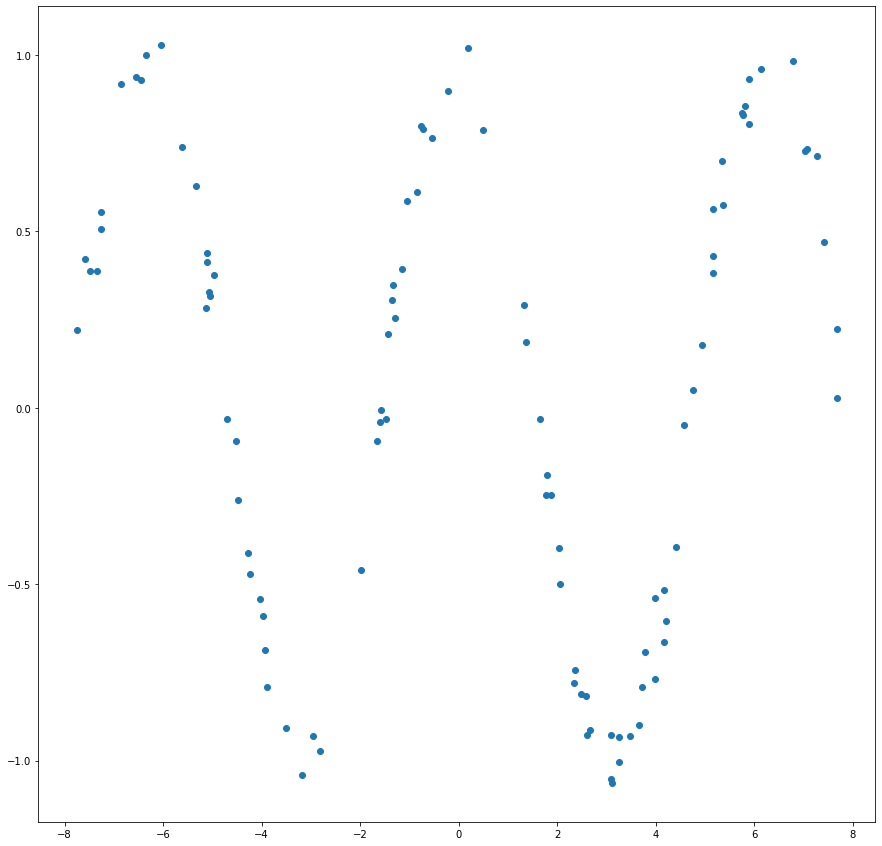

In [5]:
plt.figure(figsize=(15,15))
plt.scatter(*generatePointsNoise(100))

## The neural network model bellow implements a simple neural network with fully connected layers that fits the data

In [6]:
model = Sequential()
model.add(Dense(100,input_shape = (1,),activation = "linear"))
model.add(Dense(300,activation="sigmoid"))
model.add(Dense(300,activation="sigmoid"))
model.add(Dense(1,activation="linear"))
adamOptimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = "mse", optimizer = adamOptimizer, metrics = ['mse','mae'])

## Generate the data that will be used in the training and testing of the model

In [7]:
xtrain, ytrain = generatePointsNoise(100,)
xtest, ytest = generatePointsNoise(20)

## The training phase is logged to a cache that is used bellow to show the network's progress over the epochs of training

In [8]:
history_cache = model.fit(xtrain,
                          ytrain,
                          epochs=1000,
                          batch_size=1,
                          validation_data=(xtest,ytest),
                          verbose = 1
                         )

Train on 100 samples, validate on 20 samples
Epoch 1/1000
100/100 [==============================] - 1s 7ms/step - loss: 0.5726 - mse: 0.5726 - mae: 0.6739 - val_loss: 0.3565 - val_mse: 0.3565 - val_mae: 0.5148
Epoch 2/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5640 - mse: 0.5640 - mae: 0.6716 - val_loss: 0.3952 - val_mse: 0.3952 - val_mae: 0.5098
Epoch 3/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5653 - mse: 0.5653 - mae: 0.6718 - val_loss: 0.3577 - val_mse: 0.3577 - val_mae: 0.5048
Epoch 4/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5240 - mse: 0.5240 - mae: 0.6486 - val_loss: 0.3987 - val_mse: 0.3987 - val_mae: 0.5533
Epoch 5/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5542 - mse: 0.5542 - mae: 0.6588 - val_loss: 0.3713 - val_mse: 0.3713 - val_mae: 0.5023
Epoch 6/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5939 - mse: 0.5939 - mae: 0.6808 - val_loss: 0.

Epoch 50/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5361 - mse: 0.5361 - mae: 0.6590 - val_loss: 0.3546 - val_mse: 0.3546 - val_mae: 0.4984
Epoch 51/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5308 - mse: 0.5308 - mae: 0.6439 - val_loss: 0.3389 - val_mse: 0.3389 - val_mae: 0.4748
Epoch 52/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5394 - mse: 0.5394 - mae: 0.6575 - val_loss: 0.5952 - val_mse: 0.5952 - val_mae: 0.6198
Epoch 53/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - mae: 0.6824 - val_loss: 0.3340 - val_mse: 0.3340 - val_mae: 0.4760
Epoch 54/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5226 - mse: 0.5226 - mae: 0.6456 - val_loss: 0.3814 - val_mse: 0.3814 - val_mae: 0.4971
Epoch 55/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5519 - mse: 0.5519 - mae: 0.6607 - val_loss: 0.3438 - val_mse: 0.3438 - val_mae: 0.489

100/100 [==============================] - 0s 2ms/step - loss: 0.5509 - mse: 0.5509 - mae: 0.6676 - val_loss: 0.3282 - val_mse: 0.3282 - val_mae: 0.4884
Epoch 100/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5203 - mse: 0.5203 - mae: 0.6398 - val_loss: 0.3183 - val_mse: 0.3183 - val_mae: 0.4489
Epoch 101/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5207 - mse: 0.5207 - mae: 0.6377 - val_loss: 0.3682 - val_mse: 0.3682 - val_mae: 0.4738
Epoch 102/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5039 - mse: 0.5039 - mae: 0.6283 - val_loss: 0.3077 - val_mse: 0.3077 - val_mae: 0.4607
Epoch 103/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5059 - mse: 0.5059 - mae: 0.6257 - val_loss: 0.3547 - val_mse: 0.3547 - val_mae: 0.5254
Epoch 104/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.5388 - mse: 0.5388 - mae: 0.6533 - val_loss: 0.3141 - val_mse: 0.3141 - val_mae: 0.4586
Epoch 1

Epoch 148/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.4480 - mse: 0.4480 - mae: 0.5957 - val_loss: 0.2879 - val_mse: 0.2879 - val_mae: 0.4563
Epoch 149/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.4451 - mse: 0.4451 - mae: 0.5895 - val_loss: 0.3007 - val_mse: 0.3007 - val_mae: 0.4366
Epoch 150/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.4584 - mse: 0.4584 - mae: 0.5955 - val_loss: 0.2634 - val_mse: 0.2634 - val_mae: 0.4226
Epoch 151/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.4458 - mse: 0.4458 - mae: 0.5973 - val_loss: 0.2894 - val_mse: 0.2894 - val_mae: 0.4644
Epoch 152/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.4430 - mse: 0.4430 - mae: 0.5894 - val_loss: 0.2637 - val_mse: 0.2637 - val_mae: 0.4372
Epoch 153/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.4711 - mse: 0.4711 - mae: 0.6048 - val_loss: 0.2534 - val_mse: 0.2534 - val_mae:

Epoch 197/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.2896 - mse: 0.2896 - mae: 0.4442 - val_loss: 0.1762 - val_mse: 0.1762 - val_mae: 0.3574
Epoch 198/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.2704 - mse: 0.2704 - mae: 0.4223 - val_loss: 0.2350 - val_mse: 0.2350 - val_mae: 0.4115
Epoch 199/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.2708 - mse: 0.2708 - mae: 0.4325 - val_loss: 0.1698 - val_mse: 0.1698 - val_mae: 0.3587
Epoch 200/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.2431 - mse: 0.2431 - mae: 0.3903 - val_loss: 0.2353 - val_mse: 0.2353 - val_mae: 0.3794
Epoch 201/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.2687 - mse: 0.2687 - mae: 0.4325 - val_loss: 0.1725 - val_mse: 0.1725 - val_mae: 0.3629
Epoch 202/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.2551 - mse: 0.2551 - mae: 0.4168 - val_loss: 0.2080 - val_mse: 0.2080 - val_mae:

Epoch 246/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.1740 - mse: 0.1740 - mae: 0.3399 - val_loss: 0.1120 - val_mse: 0.1120 - val_mae: 0.2779
Epoch 247/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.1687 - mse: 0.1687 - mae: 0.3396 - val_loss: 0.1177 - val_mse: 0.1177 - val_mae: 0.2967
Epoch 248/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.1602 - mse: 0.1602 - mae: 0.3280 - val_loss: 0.1177 - val_mse: 0.1177 - val_mae: 0.2880
Epoch 249/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.1512 - mse: 0.1512 - mae: 0.3141 - val_loss: 0.1072 - val_mse: 0.1072 - val_mae: 0.2756
Epoch 250/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.1535 - mse: 0.1535 - mae: 0.3205 - val_loss: 0.1331 - val_mse: 0.1331 - val_mae: 0.2899
Epoch 251/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.1725 - mse: 0.1725 - mae: 0.3432 - val_loss: 0.1064 - val_mse: 0.1064 - val_mae:

Epoch 295/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0925 - mse: 0.0925 - mae: 0.2499 - val_loss: 0.1059 - val_mse: 0.1059 - val_mae: 0.2501
Epoch 296/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0919 - mse: 0.0919 - mae: 0.2376 - val_loss: 0.1228 - val_mse: 0.1228 - val_mae: 0.2603
Epoch 297/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0989 - mse: 0.0989 - mae: 0.2581 - val_loss: 0.0974 - val_mse: 0.0974 - val_mae: 0.2529
Epoch 298/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0811 - mse: 0.0811 - mae: 0.2319 - val_loss: 0.1109 - val_mse: 0.1109 - val_mae: 0.2695
Epoch 299/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0914 - mse: 0.0914 - mae: 0.2362 - val_loss: 0.0968 - val_mse: 0.0968 - val_mae: 0.2490
Epoch 300/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0827 - mse: 0.0827 - mae: 0.2297 - val_loss: 0.1091 - val_mse: 0.1091 - val_mae:

Epoch 344/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0628 - mse: 0.0628 - mae: 0.1915 - val_loss: 0.0958 - val_mse: 0.0958 - val_mae: 0.2332
Epoch 345/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0617 - mse: 0.0617 - mae: 0.1881 - val_loss: 0.1679 - val_mse: 0.1679 - val_mae: 0.2979
Epoch 346/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0637 - mse: 0.0637 - mae: 0.1889 - val_loss: 0.0918 - val_mse: 0.0918 - val_mae: 0.2178
Epoch 347/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0659 - mse: 0.0659 - mae: 0.1976 - val_loss: 0.0949 - val_mse: 0.0949 - val_mae: 0.2362
Epoch 348/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0647 - mse: 0.0647 - mae: 0.1811 - val_loss: 0.0936 - val_mse: 0.0936 - val_mae: 0.2302
Epoch 349/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0594 - mse: 0.0594 - mae: 0.1775 - val_loss: 0.0962 - val_mse: 0.0962 - val_mae:

Epoch 393/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0597 - mse: 0.0597 - mae: 0.1785 - val_loss: 0.0890 - val_mse: 0.0890 - val_mae: 0.2131
Epoch 394/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0538 - mse: 0.0538 - mae: 0.1691 - val_loss: 0.0888 - val_mse: 0.0888 - val_mae: 0.2090
Epoch 395/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0525 - mse: 0.0525 - mae: 0.1602 - val_loss: 0.1079 - val_mse: 0.1079 - val_mae: 0.2538
Epoch 396/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0721 - mse: 0.0721 - mae: 0.2004 - val_loss: 0.0839 - val_mse: 0.0839 - val_mae: 0.2065
Epoch 397/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0523 - mse: 0.0523 - mae: 0.1696 - val_loss: 0.1069 - val_mse: 0.1069 - val_mae: 0.2664
Epoch 398/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0525 - mse: 0.0525 - mae: 0.1671 - val_loss: 0.0947 - val_mse: 0.0947 - val_mae:

Epoch 442/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0482 - mse: 0.0482 - mae: 0.1609 - val_loss: 0.1093 - val_mse: 0.1093 - val_mae: 0.2571
Epoch 443/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0490 - mse: 0.0490 - mae: 0.1673 - val_loss: 0.0899 - val_mse: 0.0899 - val_mae: 0.2275
Epoch 444/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0448 - mse: 0.0448 - mae: 0.1516 - val_loss: 0.0849 - val_mse: 0.0849 - val_mae: 0.2096
Epoch 445/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - mae: 0.1591 - val_loss: 0.0892 - val_mse: 0.0892 - val_mae: 0.2157
Epoch 446/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0479 - mse: 0.0479 - mae: 0.1571 - val_loss: 0.0975 - val_mse: 0.0975 - val_mae: 0.2213
Epoch 447/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0483 - mse: 0.0483 - mae: 0.1593 - val_loss: 0.0939 - val_mse: 0.0939 - val_mae:

Epoch 491/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0431 - mse: 0.0431 - mae: 0.1501 - val_loss: 0.0850 - val_mse: 0.0850 - val_mae: 0.2184
Epoch 492/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0402 - mse: 0.0402 - mae: 0.1431 - val_loss: 0.0917 - val_mse: 0.0917 - val_mae: 0.2288
Epoch 493/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0422 - mse: 0.0422 - mae: 0.1548 - val_loss: 0.0814 - val_mse: 0.0814 - val_mae: 0.2084
Epoch 494/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364 - mae: 0.1376 - val_loss: 0.1101 - val_mse: 0.1101 - val_mae: 0.2264
Epoch 495/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0441 - mse: 0.0441 - mae: 0.1562 - val_loss: 0.0905 - val_mse: 0.0905 - val_mae: 0.2298
Epoch 496/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0388 - mse: 0.0388 - mae: 0.1422 - val_loss: 0.0877 - val_mse: 0.0877 - val_mae:

Epoch 540/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0414 - mse: 0.0414 - mae: 0.1474 - val_loss: 0.0813 - val_mse: 0.0813 - val_mae: 0.2127
Epoch 541/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0399 - mse: 0.0399 - mae: 0.1412 - val_loss: 0.0700 - val_mse: 0.0700 - val_mae: 0.1829
Epoch 542/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376 - mae: 0.1359 - val_loss: 0.0789 - val_mse: 0.0789 - val_mae: 0.1976
Epoch 543/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0411 - mse: 0.0411 - mae: 0.1574 - val_loss: 0.0742 - val_mse: 0.0742 - val_mae: 0.1941
Epoch 544/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0423 - mse: 0.0423 - mae: 0.1457 - val_loss: 0.0787 - val_mse: 0.0787 - val_mae: 0.1984
Epoch 545/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370 - mae: 0.1431 - val_loss: 0.0910 - val_mse: 0.0910 - val_mae:

Epoch 589/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0377 - mse: 0.0377 - mae: 0.1408 - val_loss: 0.0800 - val_mse: 0.0800 - val_mae: 0.2025
Epoch 590/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0356 - mse: 0.0356 - mae: 0.1383 - val_loss: 0.0720 - val_mse: 0.0720 - val_mae: 0.1963
Epoch 591/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1285 - val_loss: 0.0695 - val_mse: 0.0695 - val_mae: 0.1888
Epoch 592/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0351 - mse: 0.0351 - mae: 0.1418 - val_loss: 0.0689 - val_mse: 0.0689 - val_mae: 0.1759
Epoch 593/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0346 - mse: 0.0346 - mae: 0.1402 - val_loss: 0.0722 - val_mse: 0.0722 - val_mae: 0.1920
Epoch 594/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0365 - mse: 0.0365 - mae: 0.1327 - val_loss: 0.0800 - val_mse: 0.0800 - val_mae:

Epoch 638/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0328 - mse: 0.0328 - mae: 0.1360 - val_loss: 0.0713 - val_mse: 0.0713 - val_mae: 0.1878
Epoch 639/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.0304 - mse: 0.0304 - mae: 0.1274 - val_loss: 0.0623 - val_mse: 0.0623 - val_mae: 0.1782
Epoch 640/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.0332 - mse: 0.0332 - mae: 0.1386 - val_loss: 0.0717 - val_mse: 0.0717 - val_mae: 0.1933
Epoch 641/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0299 - mse: 0.0299 - mae: 0.1271 - val_loss: 0.0695 - val_mse: 0.0695 - val_mae: 0.1953
Epoch 642/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0326 - mse: 0.0326 - mae: 0.1321 - val_loss: 0.0679 - val_mse: 0.0679 - val_mae: 0.1918
Epoch 643/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0286 - mse: 0.0286 - mae: 0.1191 - val_loss: 0.0674 - val_mse: 0.0674 - val_mae:

Epoch 687/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.0280 - mse: 0.0280 - mae: 0.1225 - val_loss: 0.0560 - val_mse: 0.0560 - val_mae: 0.1620
Epoch 688/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0291 - mse: 0.0291 - mae: 0.1258 - val_loss: 0.0691 - val_mse: 0.0691 - val_mae: 0.1830
Epoch 689/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.0306 - mse: 0.0306 - mae: 0.1241 - val_loss: 0.0703 - val_mse: 0.0703 - val_mae: 0.1874
Epoch 690/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0257 - mse: 0.0257 - mae: 0.1126 - val_loss: 0.0741 - val_mse: 0.0741 - val_mae: 0.2015
Epoch 691/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0294 - mse: 0.0294 - mae: 0.1280 - val_loss: 0.0578 - val_mse: 0.0578 - val_mae: 0.1740
Epoch 692/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.0290 - mse: 0.0290 - mae: 0.1268 - val_loss: 0.0750 - val_mse: 0.0750 - val_mae:

Epoch 736/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0252 - mse: 0.0252 - mae: 0.1221 - val_loss: 0.0630 - val_mse: 0.0630 - val_mae: 0.1886
Epoch 737/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.0278 - mae: 0.1240 - val_loss: 0.0527 - val_mse: 0.0527 - val_mae: 0.1582
Epoch 738/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.1065 - val_loss: 0.0766 - val_mse: 0.0766 - val_mae: 0.2168
Epoch 739/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0276 - mse: 0.0276 - mae: 0.1270 - val_loss: 0.0688 - val_mse: 0.0688 - val_mae: 0.1856
Epoch 740/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0265 - mse: 0.0265 - mae: 0.1198 - val_loss: 0.0528 - val_mse: 0.0528 - val_mae: 0.1610
Epoch 741/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0245 - mse: 0.0245 - mae: 0.1100 - val_loss: 0.0517 - val_mse: 0.0517 - val_mae:

Epoch 785/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0274 - mse: 0.0274 - mae: 0.1179 - val_loss: 0.0663 - val_mse: 0.0663 - val_mae: 0.1918
Epoch 786/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0209 - mse: 0.0209 - mae: 0.1017 - val_loss: 0.0682 - val_mse: 0.0682 - val_mae: 0.1961
Epoch 787/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1087 - val_loss: 0.0614 - val_mse: 0.0614 - val_mae: 0.1770
Epoch 788/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0225 - mse: 0.0225 - mae: 0.1095 - val_loss: 0.0527 - val_mse: 0.0527 - val_mae: 0.1588
Epoch 789/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0212 - mse: 0.0212 - mae: 0.1027 - val_loss: 0.0512 - val_mse: 0.0512 - val_mae: 0.1659
Epoch 790/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0216 - mse: 0.0216 - mae: 0.1032 - val_loss: 0.0489 - val_mse: 0.0489 - val_mae:

Epoch 834/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0191 - mse: 0.0191 - mae: 0.1004 - val_loss: 0.0643 - val_mse: 0.0643 - val_mae: 0.2085
Epoch 835/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.1007 - val_loss: 0.0453 - val_mse: 0.0453 - val_mae: 0.1580
Epoch 836/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.1115 - val_loss: 0.0450 - val_mse: 0.0450 - val_mae: 0.1612
Epoch 837/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.0997 - val_loss: 0.0604 - val_mse: 0.0604 - val_mae: 0.1848
Epoch 838/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1037 - val_loss: 0.0508 - val_mse: 0.0508 - val_mae: 0.1655
Epoch 839/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.0174 - mse: 0.0174 - mae: 0.0926 - val_loss: 0.0516 - val_mse: 0.0516 - val_mae:

Epoch 883/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0192 - mse: 0.0192 - mae: 0.1021 - val_loss: 0.0458 - val_mse: 0.0458 - val_mae: 0.1554
Epoch 884/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0175 - mse: 0.0175 - mae: 0.0915 - val_loss: 0.0431 - val_mse: 0.0431 - val_mae: 0.1520
Epoch 885/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0175 - mse: 0.0175 - mae: 0.0889 - val_loss: 0.0434 - val_mse: 0.0434 - val_mae: 0.1517
Epoch 886/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0189 - mse: 0.0189 - mae: 0.0993 - val_loss: 0.0370 - val_mse: 0.0370 - val_mae: 0.1359
Epoch 887/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184 - mae: 0.1017 - val_loss: 0.0443 - val_mse: 0.0443 - val_mae: 0.1601
Epoch 888/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0167 - mse: 0.0167 - mae: 0.0933 - val_loss: 0.0442 - val_mse: 0.0442 - val_mae:

Epoch 932/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0815 - val_loss: 0.0421 - val_mse: 0.0421 - val_mae: 0.1675
Epoch 933/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0149 - mse: 0.0149 - mae: 0.0884 - val_loss: 0.0424 - val_mse: 0.0424 - val_mae: 0.1515
Epoch 934/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0165 - mse: 0.0165 - mae: 0.0940 - val_loss: 0.0383 - val_mse: 0.0383 - val_mae: 0.1371
Epoch 935/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0173 - mse: 0.0173 - mae: 0.0933 - val_loss: 0.0366 - val_mse: 0.0366 - val_mae: 0.1397
Epoch 936/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.0886 - val_loss: 0.0401 - val_mse: 0.0401 - val_mae: 0.1569
Epoch 937/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0153 - mse: 0.0153 - mae: 0.0877 - val_loss: 0.0448 - val_mse: 0.0448 - val_mae:

Epoch 981/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.0896 - val_loss: 0.0525 - val_mse: 0.0525 - val_mae: 0.1962
Epoch 982/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0154 - mse: 0.0154 - mae: 0.0889 - val_loss: 0.0342 - val_mse: 0.0342 - val_mae: 0.1401
Epoch 983/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0887 - val_loss: 0.0352 - val_mse: 0.0352 - val_mae: 0.1412
Epoch 984/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0795 - val_loss: 0.0346 - val_mse: 0.0346 - val_mae: 0.1457
Epoch 985/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0836 - val_loss: 0.0575 - val_mse: 0.0575 - val_mae: 0.1969
Epoch 986/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0131 - mse: 0.0131 - mae: 0.0819 - val_loss: 0.0422 - val_mse: 0.0422 - val_mae:

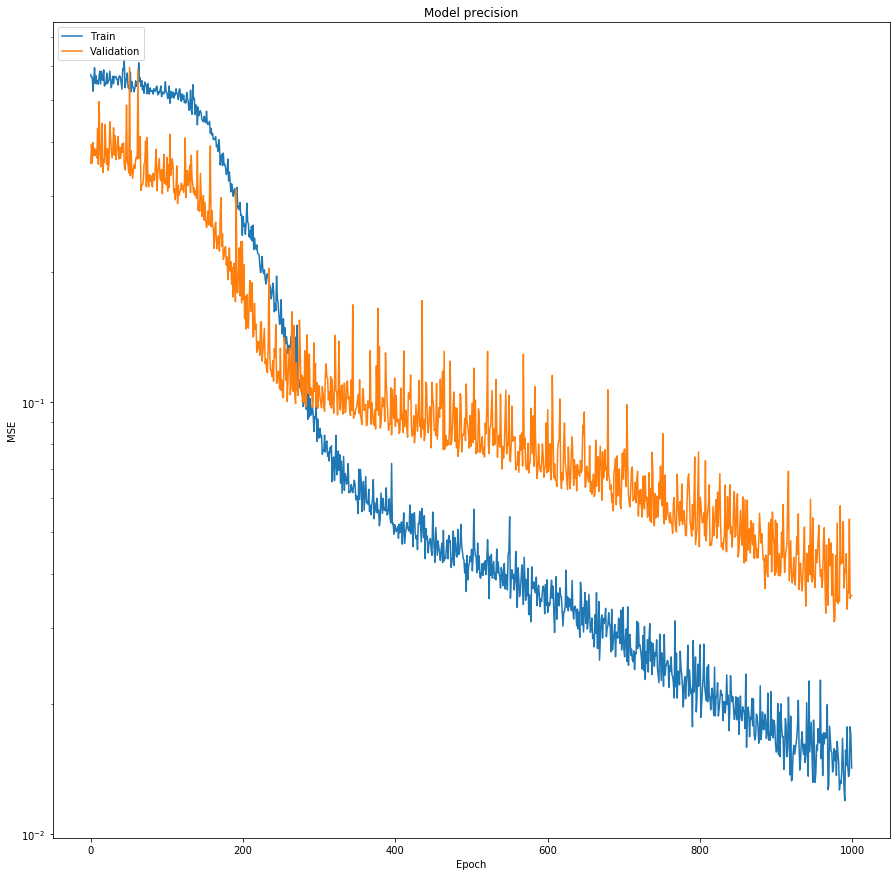

In [9]:
plt.figure(figsize=(15,15))
plt.plot(history_cache.history['mse'])
plt.plot(history_cache.history['val_mse'])
plt.title('Model precision')
plt.ylabel('MSE')
plt.yscale("log")
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')

## This graph bellow is showing the actual learned function with the blue line, the blue dots are the training points we used and the yellow are the test points

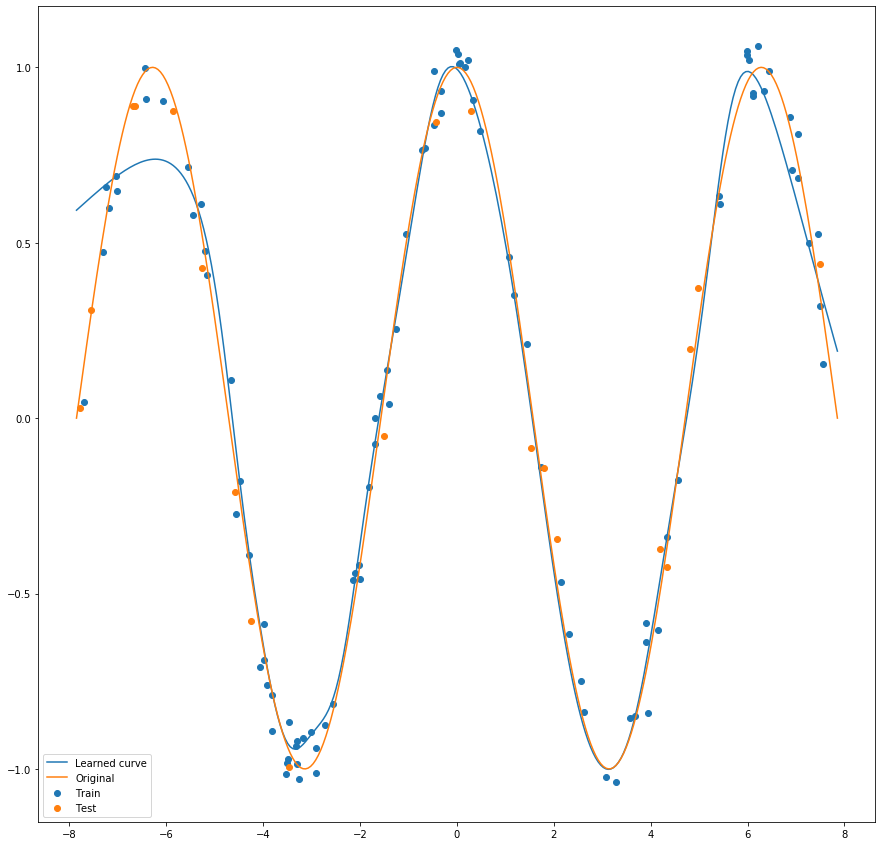

In [10]:
xpredict = np.linspace(-np.pi*5/2,np.pi*5/2,300)
ypredict = model.predict(xpredict)
plt.figure(figsize=(15,15))
plt.plot(xpredict,ypredict)
plt.plot(xpredict,np.cos(xpredict))
plt.scatter(xtrain,ytrain)
plt.scatter(xtest,ytest)
plt.legend(['Learned curve','Original','Train','Test'])

## Now we can calculate the R² value for this regressor to assess the performance of the network

In [11]:
originalFunction = np.cos(xpredict)
r2_score(ypredict,originalFunction)

0.9726119612854608